In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('income.csv')

In [7]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [4]:
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
df['SAge'] = scaler.fit_transform(df[['Age']])

In [11]:
df['SIncome'] = scaler.fit_transform(df[['Income($)']])

In [13]:
df.columns

Index(['Name', 'Age', 'Income($)', 'SAge', 'SIncome'], dtype='object')

In [15]:
from sklearn.cluster import KMeans

# Elbow Method

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SAge', 'SIncome']])
    sse.append(km.inertia_)      

In [21]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553095,
 0.3491047094419565,
 0.2621792762345213,
 0.22020960864009395,
 0.16858512236029757,
 0.13265419827245162,
 0.10188787724979426]

In [20]:
import matplotlib.pyplot as plt

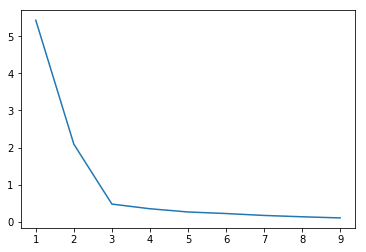

In [22]:
plt.plot(k_rng,sse)

In [27]:
km = KMeans(n_clusters=3)

In [28]:
km.fit_predict(df[['SAge', 'SIncome']])

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [29]:
df['cluster'] = km.fit_predict(df[['SAge', 'SIncome']])

In [31]:
df.head(5)

,Name,Age,Income($),SAge,SIncome,cluster
0,Rob,27,70000,0.058824,0.213675,1
1,Michael,29,90000,0.176471,0.384615,1
2,Mohan,29,61000,0.176471,0.136752,1
3,Ismail,28,60000,0.117647,0.128205,1
4,Kory,42,150000,0.941176,0.897436,0


In [33]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [34]:
df.columns

Index(['Name', 'Age', 'Income($)', 'SAge', 'SIncome', 'cluster'], dtype='object')

In [43]:
ndf1 =df[df['cluster'] == 0]

In [44]:
ndf2 =df[df['cluster'] == 1]

In [45]:
ndf3 =df[df['cluster'] == 2]

In [47]:
ndf1.columns

Index(['Name', 'Age', 'Income($)', 'SAge', 'SIncome', 'cluster'], dtype='object')

TypeError: unhashable type: 'numpy.ndarray'

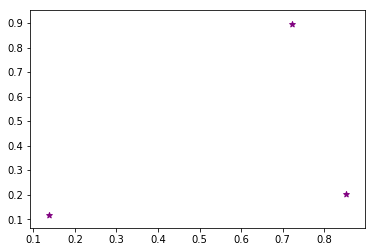

In [50]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')


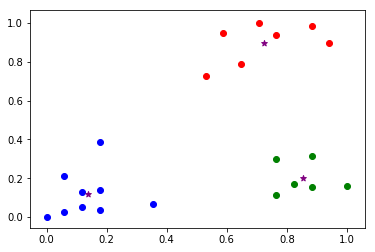

In [57]:
plt.scatter(ndf1.SAge,ndf1['SIncome'],color='red')
plt.scatter(ndf2.SAge,ndf2['SIncome'],color='blue')
plt.scatter(ndf3.SAge,ndf3['SIncome'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

In [56]:
df.columns

Index(['Name', 'Age', 'Income($)', 'SAge', 'SIncome', 'cluster'], dtype='object')

In [ ]:
plt.scatter(df.Age,df'Income($))